## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-01-26 18:47:43.315521: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-26 18:47:43.545259: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-26 18:47:44.423830: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# overall imports
import importlib
import data

# importlib.reload(sim.sim)
# importlib.reload(sim.sim_utils)
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results


#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 34.4%
RAM Usage: 18.2%
Available RAM: 823.9G
Total RAM: 1007.0G
52.4G


In [5]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

XGBoost version: 2.0.3
cupy version: 13.1.0


In [6]:
GPUtil.getAvailable()
# if a number is seen a GPU is available

[0]

In [7]:
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

GPU found 0


In [8]:
GPUtil.showUtilization()


| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [9]:
torch.cuda.is_available()


True

#### Null sim test <a id="sims"></a>

Number of components for 95% variance PCA: 34
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  euclidean
processing_type:  None
[array([[-2.58197970e+01, -3.26243655e+01, -1.74593909e+01],
       [-2.54812881e+01, -7.65918190e+01, -1.35143603e+01],
       [-1.64249472e+01, -6.09577167e+01, -6.73572939e+00],
       [-2.71308176e+01, -9.44905660e+01, -4.74465409e+00],
       [-6.22650602e+00, -9.24626506e+01, -3.03614458e+00],
       [-1.26992864e+01, -6.49643221e+01,  5.78797146e+00],
       [-4.70372737e+01, -7.08178914e+01,  1.05175719e+01],
       [-2.57454546e+01, -8.80149733e+01,  2.04973262e+01],
       [-8.30476190e+00, -8.10645503e+01,  2.66645503e+01],
       [-5.31723220e+01, -2.24071856e+01,  7.94278110e+00],
       [-3.72030361e+01, -2.11537002e+01,  1.55104364e+01],
       [-5.45261228e+01, -1.13253896e+01,

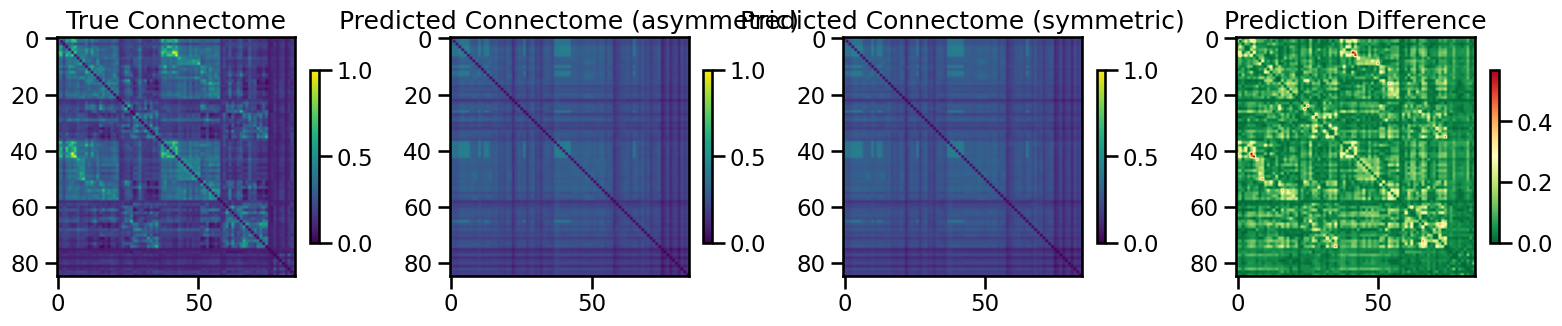

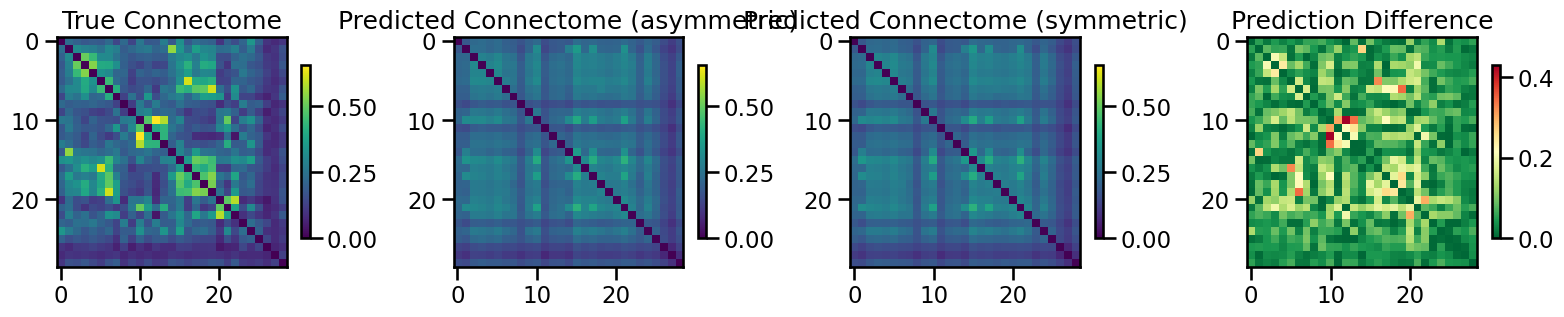


TRAIN METRICS: {'mse': 0.00850530622549579, 'mae': 0.06871674834123567, 'r2': 0.4412171413333178, 'pearson_corr': 0.6857166795230943, 'geodesic_distance': 10.218242135363637}
TEST METRICS: {'mse': 0.0092052982010742, 'mae': 0.0710532439768757, 'r2': 0.2749925280321246, 'pearson_corr': 0.5249872661198672, 'geodesic_distance': 6.638087291030004}
BEST VAL SCORE -0.011911137827629786
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constrain

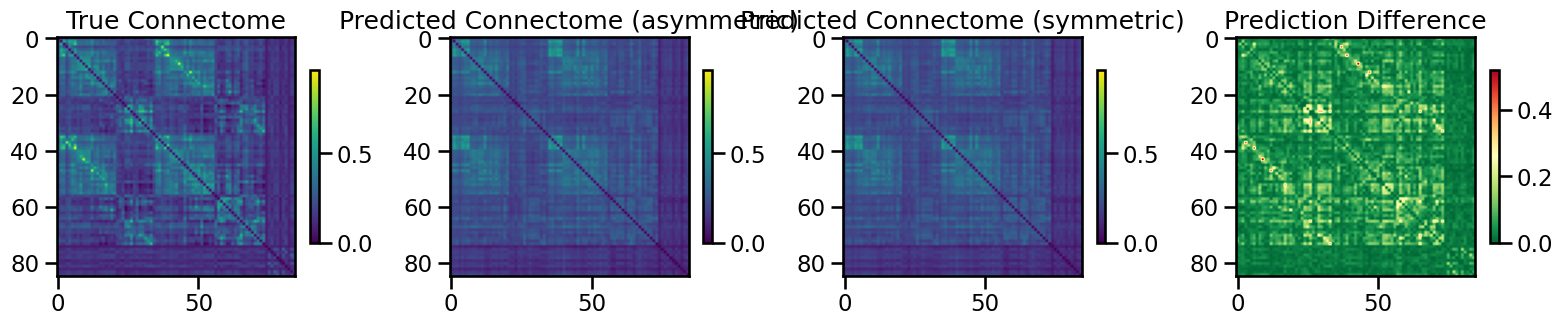

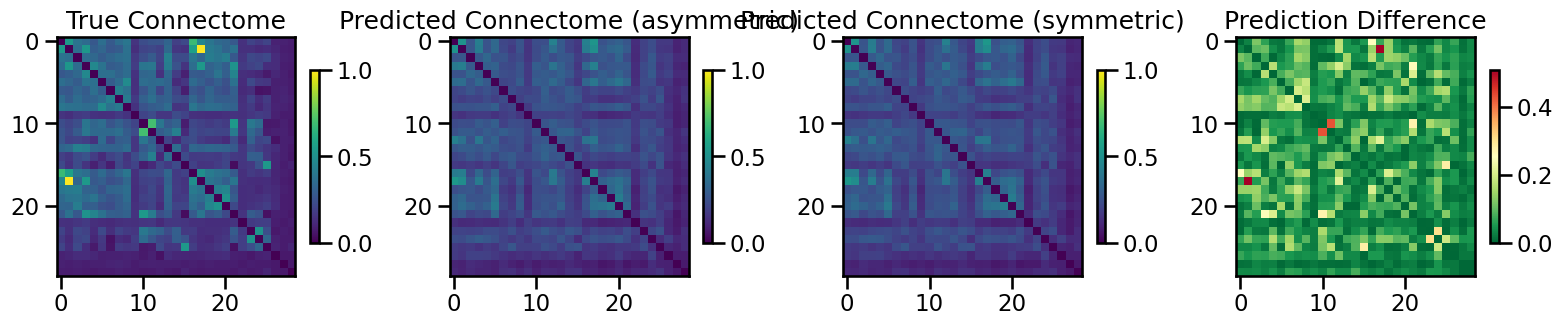


TRAIN METRICS: {'mse': 0.004769809994565701, 'mae': 0.04846415852423827, 'r2': 0.6492865227115336, 'pearson_corr': 0.8159433125739, 'geodesic_distance': 6.769412287803242}
TEST METRICS: {'mse': 0.007761384999380182, 'mae': 0.06361269405255099, 'r2': 0.5241525148645823, 'pearson_corr': 0.7362639453928761, 'geodesic_distance': 4.4256118648862}
BEST VAL SCORE -0.010373957092959709
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints':

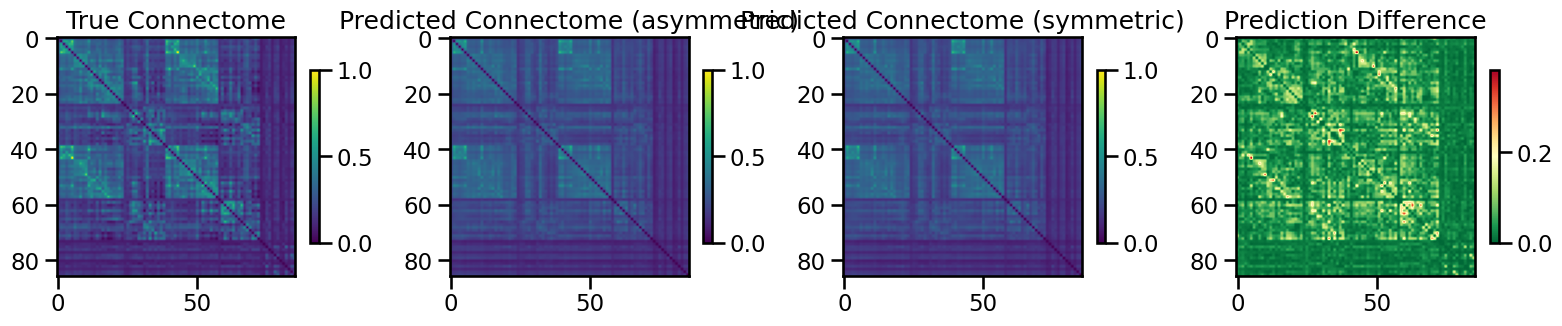

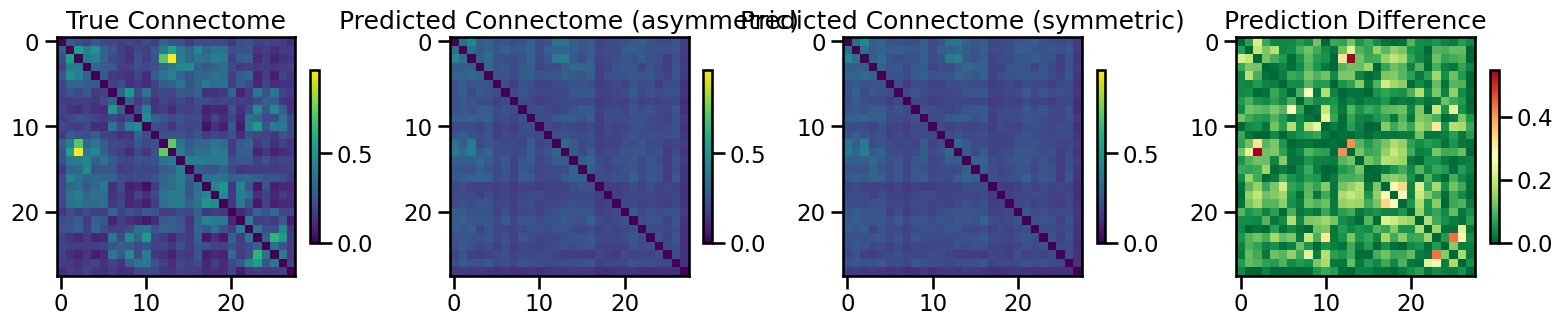


TRAIN METRICS: {'mse': 0.0033301127991387847, 'mae': 0.04007683602129973, 'r2': 0.7685365690436927, 'pearson_corr': 0.8956357727633398, 'geodesic_distance': 7.1058963890733615}
TEST METRICS: {'mse': 0.01121115287376498, 'mae': 0.07801557446529866, 'r2': 0.13870361978540469, 'pearson_corr': 0.4104527922887875, 'geodesic_distance': 5.113989997585534}
BEST VAL SCORE -0.009795352275240745
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_con

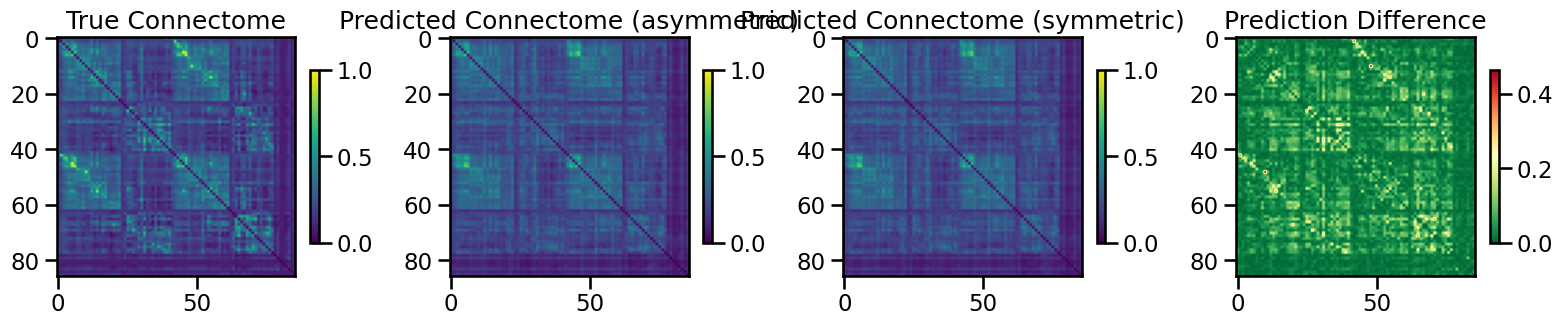

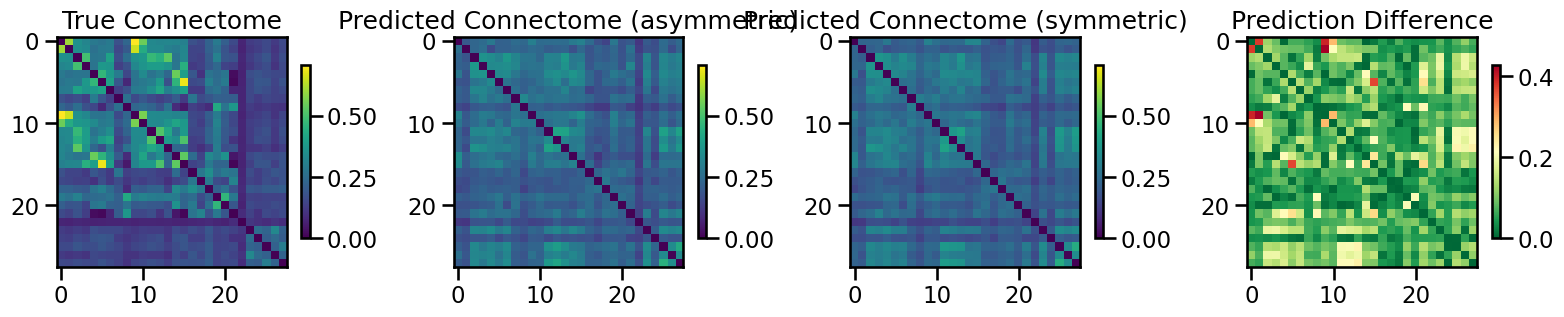


TRAIN METRICS: {'mse': 0.0034490308598418475, 'mae': 0.040109636896455095, 'r2': 0.7660904809701803, 'pearson_corr': 0.8815023738196102, 'geodesic_distance': 6.483380724972908}
TEST METRICS: {'mse': 0.011702891657162394, 'mae': 0.08525646381290326, 'r2': 0.11032488697279563, 'pearson_corr': 0.40232807542443666, 'geodesic_distance': 4.724861495016436}
BEST VAL SCORE -0.010263194949204578
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_co

[[{'model_parameters': {'objective': 'reg:squarederror',
    'base_score': None,
    'booster': None,
    'callbacks': None,
    'colsample_bylevel': None,
    'colsample_bynode': None,
    'colsample_bytree': 0.6,
    'device': 'cuda',
    'early_stopping_rounds': None,
    'enable_categorical': False,
    'eval_metric': None,
    'feature_types': None,
    'gamma': None,
    'grow_policy': None,
    'importance_type': None,
    'interaction_constraints': None,
    'learning_rate': 0.1,
    'max_bin': None,
    'max_cat_threshold': None,
    'max_cat_to_onehot': None,
    'max_delta_step': None,
    'max_depth': 3,
    'max_leaves': None,
    'min_child_weight': None,
    'missing': nan,
    'monotone_constraints': None,
    'multi_strategy': None,
    'n_estimators': 50,
    'n_jobs': None,
    'num_parallel_tree': None,
    'random_state': 42,
    'reg_alpha': 1,
    'reg_lambda': 0,
    'sampling_method': None,
    'scale_pos_weight': None,
    'subsample': 1,
    'tree_method': 'g

In [15]:
# Run simulation
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='xgboost', 
              feature_type=[
                            #{'structural': 'spatial_null'},
                            #{'transcriptome': 'correlation'},
                            {'euclidean': None}
                            ],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              search_method=('bayes', 'mse', 20),
              save_sim=False,
              track_wandb=False, 
              skip_cv=True
              )

  warnings.warn(



Number of components for 95% variance PCA: 34
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  euclidean
processing_type:  None
[array([[-2.58197970e+01, -3.26243655e+01, -1.74593909e+01],
       [-2.54812881e+01, -7.65918190e+01, -1.35143603e+01],
       [-1.64249472e+01, -6.09577167e+01, -6.73572939e+00],
       [-2.71308176e+01, -9.44905660e+01, -4.74465409e+00],
       [-6.22650602e+00, -9.24626506e+01, -3.03614458e+00],
       [-1.26992864e+01, -6.49643221e+01,  5.78797146e+00],
       [-4.70372737e+01, -7.08178914e+01,  1.05175719e+01],
       [-2.57454546e+01, -8.80149733e+01,  2.04973262e+01],
       [-8.30476190e+00, -8.10645503e+01,  2.66645503e+01],
       [-5.31723220e+01, -2.24071856e+01,  7.94278110e+00],
       [-3.72030361e+01, -2.11537002e+01,  1.55104364e+01],
       [-5.45261228e+01, -1.13253896e+01,

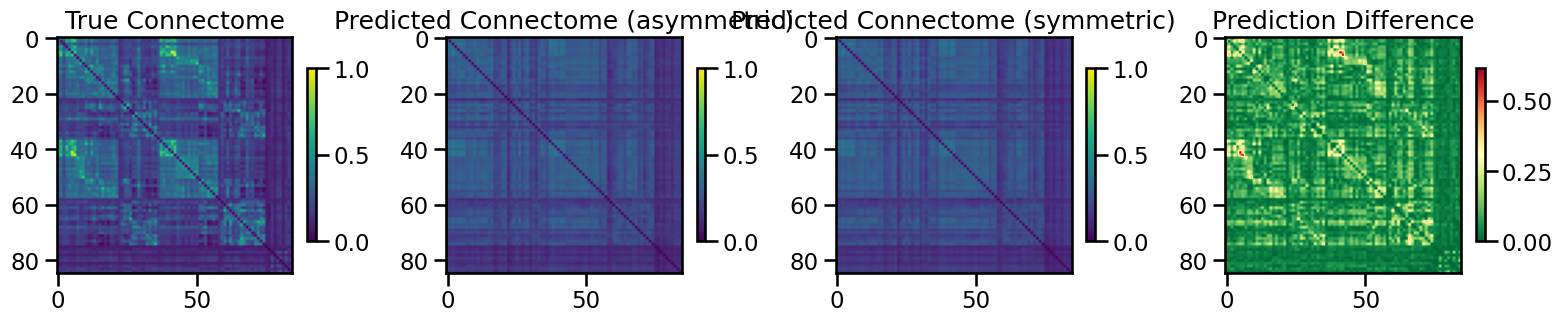

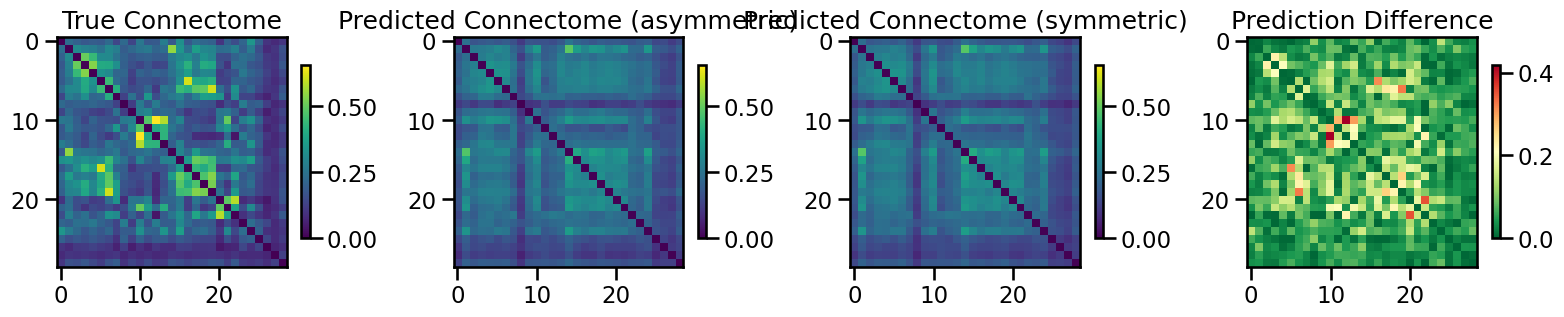


TRAIN METRICS: {'mse': 0.008942901750471481, 'mae': 0.06776637877583419, 'r2': 0.41246792620774353, 'pearson_corr': 0.6578442592941192, 'geodesic_distance': 8.088069272006065}
TEST METRICS: {'mse': 0.009035173640966095, 'mae': 0.07184201069809118, 'r2': 0.28839150485497533, 'pearson_corr': 0.5402181463604654, 'geodesic_distance': 6.763840382091413}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 6, 'hidden_dims': [64, 32], 'dropout_rate': 0.1, 'learning_rate': 0.0001, 'weight_decay': 0.01, 'batch_size': 256, 'epochs': 200, 'device': 'cuda'}


  warnings.warn(



CPU Usage: 35.0%
RAM Usage: 18.3%
Available RAM: 823.0G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |

 Test fold num: 2 X_train shape: (7140, 6) Y_train shape: (7140,) X_test shape: (812, 6) Y_test shape: (812,)
1
3
4
BEST CONFIG {'hidden_dims': [64, 32], 'learning_rate': 0.0001, 'batch_size': 256, 'dropout_rate': 0.1, 'weight_decay': 0.01, 'input_dim': 6, 'epochs': 200}
Number of learnable parameters in MLP: 2753
Epoch 10/200, Train Loss: 0.0149, Val Loss: 0.0077
Epoch 20/200, Train Loss: 0.0104, Val Loss: 0.0054
Epoch 30/200, Train Loss: 0.0082, Val Loss: 0.0045
Epoch 40/200, Train Loss: 0.0066, Val Loss: 0.0044
Epoch 50/200, Train Loss: 0.0056, Val Loss: 0.0041
Epoch 60/200, Train Loss: 0.0049, Val Loss: 0.0040
Epoch 70/200, Train Loss: 0.0045, Val Loss: 0.0037
Epoch 80/200, Train Loss: 0.0041, Val Loss: 0.0041
Epoch 90/200, Train Loss: 0.0039, Val Loss: 0.0040
Epoch 100/200, Train Loss: 0.0037, Val Loss: 0.0036
Epoch 110/200, Train Loss: 0.0036, Val L

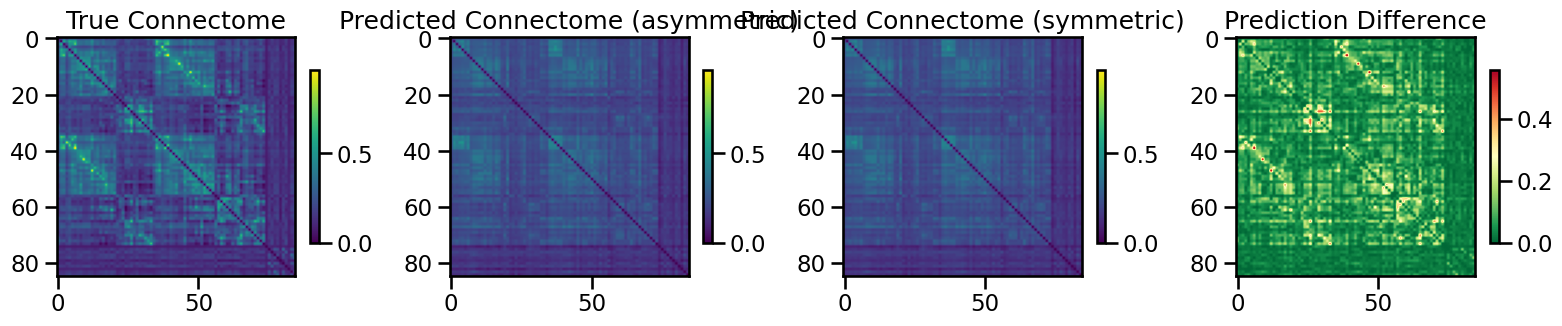

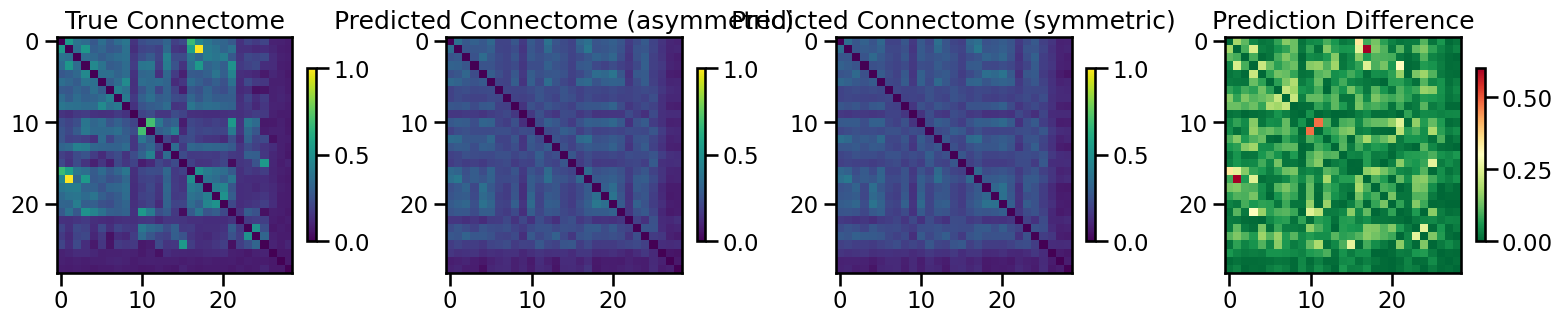


TRAIN METRICS: {'mse': 0.007181988373941035, 'mae': 0.059095794502979415, 'r2': 0.4719244331870832, 'pearson_corr': 0.7045130493502475, 'geodesic_distance': 7.652276667091575}
TEST METRICS: {'mse': 0.009264377727645672, 'mae': 0.06935263298030515, 'r2': 0.43200461729487416, 'pearson_corr': 0.6759266156279045, 'geodesic_distance': 4.681481028907787}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 6, 'hidden_dims': [64, 32], 'dropout_rate': 0.1, 'learning_rate': 0.0001, 'weight_decay': 0.01, 'batch_size': 256, 'epochs': 200, 'device': 'cuda'}


  warnings.warn(



CPU Usage: 34.9%
RAM Usage: 18.3%
Available RAM: 822.9G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |

 Test fold num: 3 X_train shape: (7310, 6) Y_train shape: (7310,) X_test shape: (756, 6) Y_test shape: (756,)
1
2
4
BEST CONFIG {'hidden_dims': [64, 32], 'learning_rate': 0.0001, 'batch_size': 256, 'dropout_rate': 0.1, 'weight_decay': 0.01, 'input_dim': 6, 'epochs': 200}
Number of learnable parameters in MLP: 2753
Epoch 10/200, Train Loss: 0.0146, Val Loss: 0.0084
Epoch 20/200, Train Loss: 0.0103, Val Loss: 0.0064
Epoch 30/200, Train Loss: 0.0078, Val Loss: 0.0058
Epoch 40/200, Train Loss: 0.0064, Val Loss: 0.0054
Epoch 50/200, Train Loss: 0.0054, Val Loss: 0.0053
Epoch 60/200, Train Loss: 0.0046, Val Loss: 0.0053
Epoch 70/200, Train Loss: 0.0042, Val Loss: 0.0052
Epoch 80/200, Train Loss: 0.0038, Val Loss: 0.0052
Epoch 90/200, Train Loss: 0.0035, Val Loss: 0.0053
Epoch 100/200, Train Loss: 0.0033, Val Loss: 0.0050
Epoch 110/200, Train Loss: 0.0032, Val L

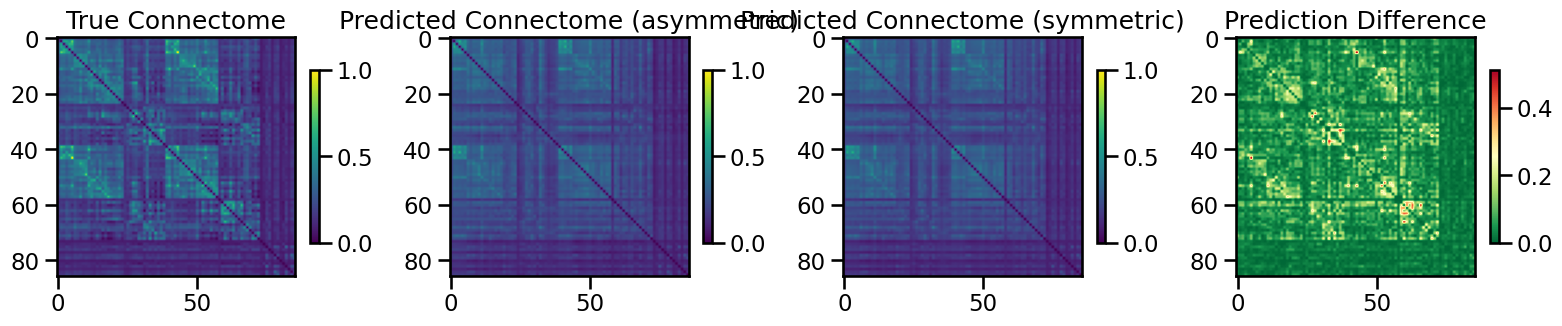

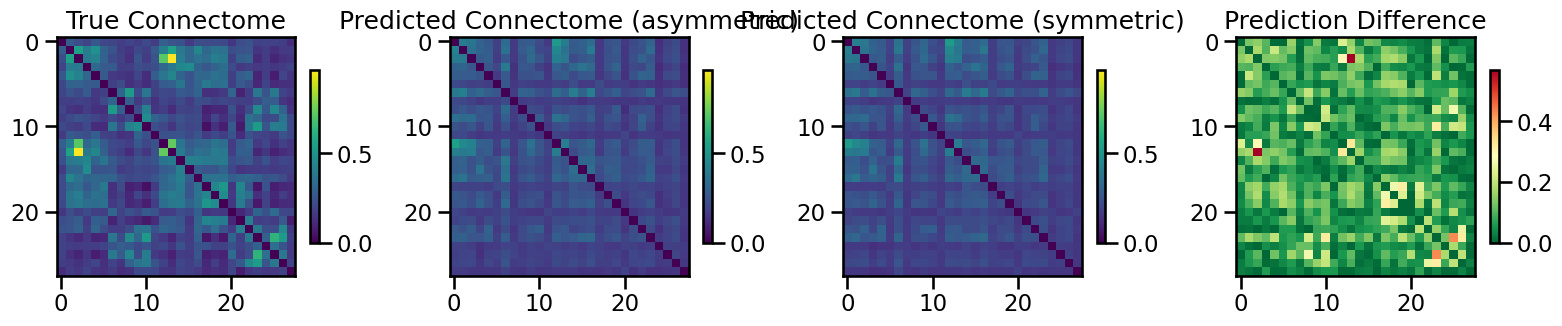


TRAIN METRICS: {'mse': 0.0056721915366415914, 'mae': 0.051159821464883175, 'r2': 0.6057476147799175, 'pearson_corr': 0.7912383310754731, 'geodesic_distance': 8.362656120589563}
TEST METRICS: {'mse': 0.011903472591649448, 'mae': 0.082774428234, 'r2': 0.08551618458768695, 'pearson_corr': 0.4088990506886687, 'geodesic_distance': 5.545213226493661}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 6, 'hidden_dims': [64, 32], 'dropout_rate': 0.1, 'learning_rate': 0.0001, 'weight_decay': 0.01, 'batch_size': 256, 'epochs': 200, 'device': 'cuda'}


  warnings.warn(



CPU Usage: 34.5%
RAM Usage: 18.3%
Available RAM: 823.0G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |

 Test fold num: 4 X_train shape: (7310, 6) Y_train shape: (7310,) X_test shape: (756, 6) Y_test shape: (756,)
1
2
3
BEST CONFIG {'hidden_dims': [64, 32], 'learning_rate': 0.0001, 'batch_size': 256, 'dropout_rate': 0.1, 'weight_decay': 0.01, 'input_dim': 6, 'epochs': 200}
Number of learnable parameters in MLP: 2753
Epoch 10/200, Train Loss: 0.0176, Val Loss: 0.0080
Epoch 20/200, Train Loss: 0.0120, Val Loss: 0.0053
Epoch 30/200, Train Loss: 0.0093, Val Loss: 0.0045
Epoch 40/200, Train Loss: 0.0073, Val Loss: 0.0041
Epoch 50/200, Train Loss: 0.0060, Val Loss: 0.0039
Epoch 60/200, Train Loss: 0.0053, Val Loss: 0.0038
Epoch 70/200, Train Loss: 0.0047, Val Loss: 0.0037
Epoch 80/200, Train Loss: 0.0042, Val Loss: 0.0035
Epoch 90/200, Train Loss: 0.0039, Val Loss: 0.0034
Epoch 100/200, Train Loss: 0.0038, Val Loss: 0.0033
Epoch 110/200, Train Loss: 0.0037, Val L

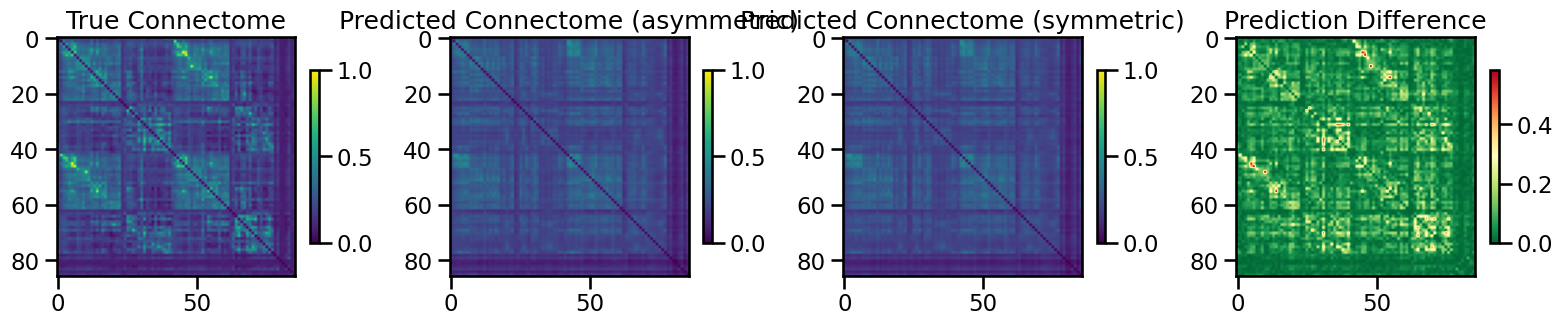

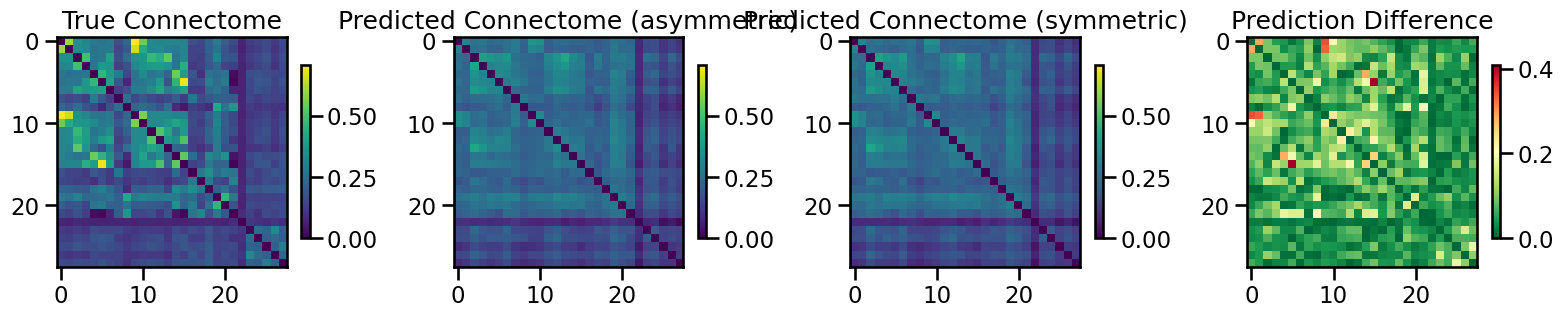


TRAIN METRICS: {'mse': 0.007181523472256464, 'mae': 0.05744602155334563, 'r2': 0.5129568943973157, 'pearson_corr': 0.7361120949216369, 'geodesic_distance': 8.590812044163664}
TEST METRICS: {'mse': 0.007525942555266441, 'mae': 0.06572884181391517, 'r2': 0.4278641561724571, 'pearson_corr': 0.6576450977794586, 'geodesic_distance': 5.092513591762131}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 6, 'hidden_dims': [64, 32], 'dropout_rate': 0.1, 'learning_rate': 0.0001, 'weight_decay': 0.01, 'batch_size': 256, 'epochs': 200, 'device': 'cuda'}
CPU Usage: 34.6%
RAM Usage: 18.3%
Available RAM: 823.0G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


[[{'model_parameters': {'input_dim': 6,
    'hidden_dims': [64, 32],
    'dropout_rate': 0.1,
    'learning_rate': 0.0001,
    'weight_decay': 0.01,
    'batch_size': 256,
    'epochs': 200,
    'device': 'cuda'},
   'train_metrics': {'mse': 0.008942901750471481,
    'mae': 0.06776637877583419,
    'r2': 0.41246792620774353,
    'pearson_corr': 0.6578442592941192,
    'geodesic_distance': 8.088069272006065},
   'best_val_score': 0.0,
   'test_metrics': {'mse': 0.009035173640966095,
    'mae': 0.07184201069809118,
    'r2': 0.28839150485497533,
    'pearson_corr': 0.5402181463604654,
    'geodesic_distance': 6.763840382091413},
   'y_true': array([0.23196538, 0.23196538, 0.20476283, 0.20476283, 0.18000612,
          0.18000612, 0.19408464, 0.19408464, 0.18459954, 0.18459954,
          0.2273786 , 0.2273786 , 0.13884437, 0.13884437, 0.22359384,
          0.22359384, 0.13722043, 0.13722043, 0.25985065, 0.25985065,
          0.1813583 , 0.1813583 , 0.1848249 , 0.1848249 , 0.27508912,
     

In [16]:
# Run simulation
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='dynamic_mlp', 
              feature_type=[
                            #{'structural': 'spatial_null'},
                            #{'transcriptome': 'correlation'},
                            {'euclidean': None}
                            ],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              search_method=('wandb', 'mse', 10),
              save_sim=False,
              track_wandb=False, 
              skip_cv=True
              )